In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../get_branch/linear')
sys.path.append('../../get_branch/cnn')
sys.path.append('../../get_branch/max_pooling')
sys.path.append('../../model_json/make_json_program/cnn/test')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_simple_cnn_max_pooling_test
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 5

In [3]:
make_simple_cnn_max_pooling_test.make_json()

In [4]:
json_file = open('../../model_json/json/simple_cnn_max_pooling_test.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 5,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn'},
 'layer1': {'input_channels': 5,
  'out_channels': 5,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling'},
 'layer2': {'input_channels': 5,
  'out_channels': 7,
  'kernel_size': 2,
  'layer_type': 'hidden',
  'processing_type': 'cnn'},
 'layer3': {'input_features': 63,
  'out_features': 4,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer4': {'input_features': 4,
  'out_features': 2,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            print(linear_hidden_branch.get_branch(layer_json_value))
            print(len(linear_hidden_branch.get_branch(layer_json_value)))
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(IMG_SIZE)
            print(max_pooling_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(one_layer_branch_list))
            
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            print(linear_output_branch.get_branch(layer_json_value))
            print(len(linear_output_branch.get_branch(layer_json_value)))
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

3
(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1]), 2)
125
[28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28]
45
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
63
[2 2 2 2]
4


array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [6]:
IMG_SIZE

3

(array([192.,   0.,   0.,   0.,   0.,   0.,  45.,   0.,   0.,  75.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <a list of 10 Patch objects>)

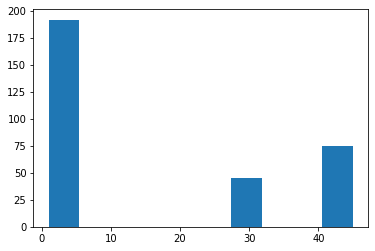

In [7]:
plt.hist(branch_list)